In [ ]:
# model = keras.models.Sequential([
#     keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape = [224, 224,3]),
#     keras.layers.MaxPooling2D(),
#     keras.layers.Conv2D(32, (2, 2), activation='relu'),
#     keras.layers.MaxPooling2D(),
#     keras.layers.Conv2D(64, (2, 2), activation='relu'),
#     keras.layers.MaxPooling2D(),
#     keras.layers.Flatten(),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dense(2, activation ='softmax')
# ])


In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import keras
from keras.utils import to_categorical
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D

In [3]:
model=Sequential()

model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))


In [4]:
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(.2))


In [5]:
model.add(Flatten())

In [6]:
model.add(Dense(128,activation="relu"))

In [7]:
model.add(Dense(1,activation="sigmoid"))
#softMax activation function is used for building the output layer.
#when using softmax model result was farely low

In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#model.fit_generator(training_set,validation_data=test_set,epochs=50, steps_per_epoch=len(training_set), validation_steps=len(test_set) )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [8]:
#training data processing
from pathlib import Path
import glob
import cv2
import numpy as np
img_size = 224
train_dir = Path("train")
train_all = train_dir.glob('*.jpg')
print(train_all)
train_label_store = pd.read_csv('label_train.txt', names =['value'])
train_data = []
train_label = []
i=0
train_label_store['Gender'] = train_label_store['value'].apply(lambda x:int(x.split(" ")[1]))
for img in glob.glob("train/*.jpg"):
    img = cv2.imread(img)
    img = cv2.resize(img,(img_size,img_size))
    cv_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv_img = cv_img.astype(np.float32)/255
    train_data.append(cv_img)
    
    train_label.append(train_label_store['Gender'][i])
    #print(type(train_label_store['Gender'][i]))
    i=i+1
train_data = np.array(train_data)
print(train_data.shape)
#train_data

<generator object Path.glob at 0x000002182B664510>
(1000, 224, 224, 3)


In [9]:
#Validation data processing
from pathlib import Path
import glob
import cv2
train_dir_valid = Path("Validation")
train_all_valid = train_dir.glob('*.jpg')
print(train_all_valid)
train_label_store_valid = pd.read_csv('label_validation.txt', names =['value'])
train_data_valid = []
train_label_valid = []
i=0
train_label_store_valid['Gender'] = train_label_store_valid['value'].apply(lambda x:int(x.split(" ")[1]))
for img in glob.glob("Validation/*.jpg"):
    img = cv2.imread(img)
    img = cv2.resize(img,(img_size,img_size))
    cv_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv_img = cv_img.astype(np.float32)/255
    train_data_valid.append(cv_img)
    train_label_valid.append(train_label_store_valid['Gender'][i])
    i=i+1
train_data_valid = np.array(train_data_valid)
print(train_data_valid.shape)
#print(train_label_valid.shape)
# df_valid = pd.DataFrame(train_data_valid)
# df_valid.columns = ['images']
# df_valid['labels'] = train_label_valid

<generator object Path.glob at 0x000002182B665070>
(500, 224, 224, 3)


In [ ]:
train_label_store_valid['value'][0]

In [11]:
#train_label_store['Gender'] = train_label_store['value'].apply(lambda x:x.split(" ")[1])

In [10]:
# Normalize the data
#img_size = 2**10
#print(train_data.shape)
#train_data = np.array(train_data)
#train_data = train_data.reshape(-1, img_size, img_size, 1)
#train_data_valid = np.array(train_data_valid) 
#train_data_valid.reshape(-1, img_size, img_size, 1)

#train_label = keras.utils.to_categorical(train_label, num_classes=2)

#train_label = np.array(train_label)
print(train_data.shape)
#print(train_label.shape)
#train_label_valid = np.array(train_label_valid)

#train_label_valid = keras.utils.to_categorical(train_label_valid, num_classes=2)
print(train_data_valid.shape)
#print(train_label_valid.shape)

(1000, 224, 224, 3)
(500, 224, 224, 3)


In [14]:
train_label = np.array(train_label)
train_label_valid = np.array(train_label_valid)
print(train_label)

[0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1
 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0
 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1
 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0
 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0
 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1
 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1
 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 

In [15]:
# history=model.fit(train_gen,steps_per_epoch=70,epochs=30,
#                   validation_data=valid_gen,validation_steps=50)
history = model.fit(train_data,train_label,epochs = 30
                    ,validation_data = (train_data_valid, train_label_valid))
    

Epoch 1/30
32/32 [==============================] - 22s 658ms/step - loss: 0.7796 - accuracy: 0.5670 - val_loss: 0.6295 - val_accuracy: 0.6540
Epoch 2/30
32/32 [==============================] - 20s 628ms/step - loss: 0.5592 - accuracy: 0.7140 - val_loss: 0.4890 - val_accuracy: 0.7840
Epoch 3/30
32/32 [==============================] - 24s 739ms/step - loss: 0.3981 - accuracy: 0.8320 - val_loss: 0.3364 - val_accuracy: 0.8640
Epoch 4/30
32/32 [==============================] - 24s 766ms/step - loss: 0.3068 - accuracy: 0.8730 - val_loss: 0.3457 - val_accuracy: 0.8280
Epoch 5/30
32/32 [==============================] - 22s 694ms/step - loss: 0.2277 - accuracy: 0.9130 - val_loss: 0.2959 - val_accuracy: 0.8860
Epoch 6/30
32/32 [==============================] - 22s 699ms/step - loss: 0.1738 - accuracy: 0.9310 - val_loss: 0.2956 - val_accuracy: 0.8740
Epoch 7/30
32/32 [==============================] - 25s 791ms/step - loss: 0.1609 - accuracy: 0.9340 - val_loss: 0.2850 - val_accuracy: 0.8800

In [16]:
acc = history.history['accuracy']

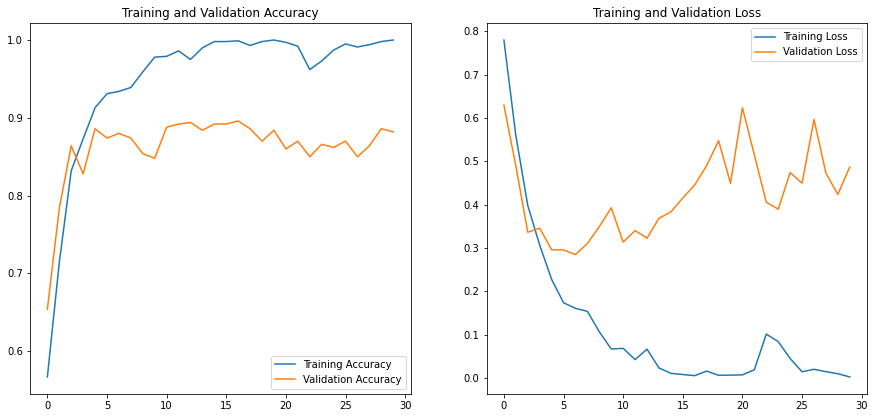

In [17]:
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(30)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save("model1_catsVSdogs_10epoch.h5")

In [20]:
from pathlib import Path
import glob
import cv2
import numpy as np
img_size = 224
test_dir = Path("test")
test_all = train_dir.glob('*')
print(train_all)

test_data = []
test_label = []
i=0

for img in glob.glob("test/*.jpg"):
    img = cv2.imread(img)
    img = cv2.resize(img,(img_size,img_size))
    cv_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv_img = cv_img.astype(np.float32)/255
    test_data.append(cv_img)
    
test_data = np.array(train_data)


<generator object Path.glob at 0x000002182B664510>


In [21]:
pred = model.predict(test_data)
print(pred)

32/32 [==============================] - 6s 112ms/step
[[1.76901012e-05]
 [1.49367296e-10]
 [2.33498937e-03]
 [9.99985158e-01]
 [9.99964595e-01]
 [9.99879539e-01]
 [3.39773973e-11]
 [9.71427798e-01]
 [9.99940813e-01]
 [2.70487543e-08]
 [9.99996722e-01]
 [5.51545698e-10]
 [1.00000000e+00]
 [9.95344102e-01]
 [3.18945109e-12]
 [9.99903440e-01]
 [5.16146713e-07]
 [9.99989510e-01]
 [9.99330640e-01]
 [4.95331944e-04]
 [1.77381968e-03]
 [9.99972820e-01]
 [9.99999702e-01]
 [9.99999702e-01]
 [9.99999344e-01]
 [9.99992371e-01]
 [2.73997512e-06]
 [2.02608935e-04]
 [3.15513837e-08]
 [9.99993622e-01]
 [9.99860883e-01]
 [7.04364709e-07]
 [9.99996603e-01]
 [4.71503927e-06]
 [9.99998331e-01]
 [3.67656895e-07]
 [9.99683261e-01]
 [2.50059667e-10]
 [1.56493348e-04]
 [9.99998629e-01]
 [3.22749993e-10]
 [9.99995232e-01]
 [8.29791436e-09]
 [3.65180381e-06]
 [1.14220157e-02]
 [9.99924779e-01]
 [9.96531546e-01]
 [9.97445047e-01]
 [7.77787864e-06]
 [4.67216050e-05]
 [9.99999762e-01]
 [3.62610884e-08]
 [6.79469

In [22]:
#pred = pred.reshape(1,-1)[0]

labels = np.argmax(train_label,axis=-1)
from sklearn.metrics import classification_report
print(classification_report(train_label,pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
#train_label = tf. utils. to_categorical(y, num_classes=None, dtype="float32")

#train_label = tf.keras.utils.to_categorical(train_label, num_classes=2)


In [ ]:
# import tensorflow as tf


In [ ]:
# train_data = tf.data.Dataset.from_tensor_slices((train_data, train_label))
# #print(train_data_valid)
# #print(train_label_valid)
# valid_data = tf.data.Dataset.from_tensor_slices((train_data_valid, train_label_valid))

# model.fit(train_data, epochs=10, validation_data=valid_data)
